<a href="https://colab.research.google.com/github/susmav1012/Rainfall-prefdiction-using-machine-learning/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEADER AND CLEANING FILES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

READING FILE AND CLEANING

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

In [ ]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df = df.dropna(axis = 0)
df.shape

(112925, 17)

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [ ]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [ ]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


# GRAPHS

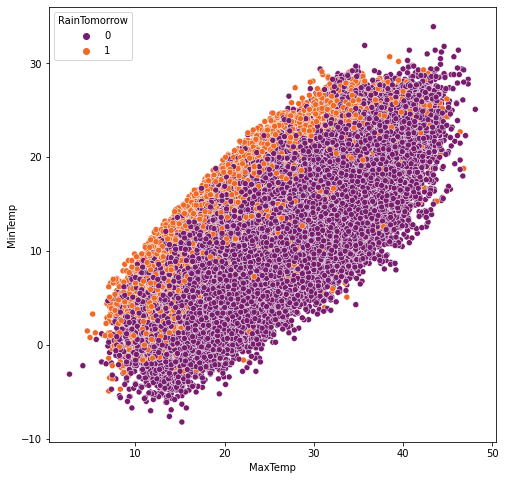

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

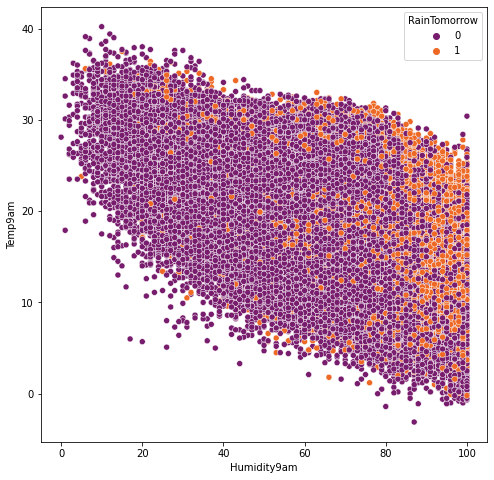

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

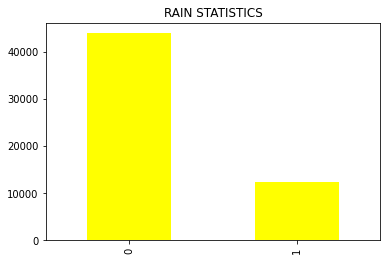

In [ ]:
df['RainTomorrow'].value_counts().plot(kind='bar',color="yellow",title="RAIN STATISTICS")

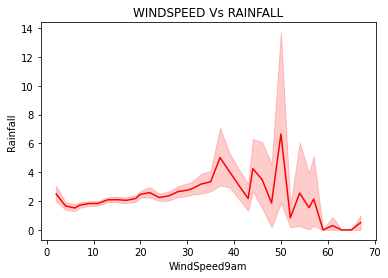

In [ ]:
plt.title("WINDSPEED Vs RAINFALL")
sns.lineplot(data=df,x='WindSpeed9am',y='Rainfall',color='red')

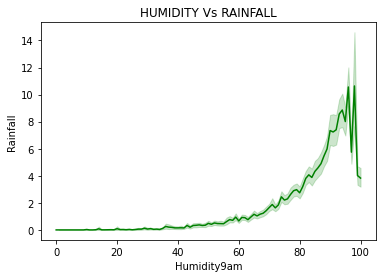

In [ ]:
plt.title("HUMIDITY Vs RAINFALL")
sns.lineplot(data=df,x='Humidity9am',y='Rainfall',color='green')

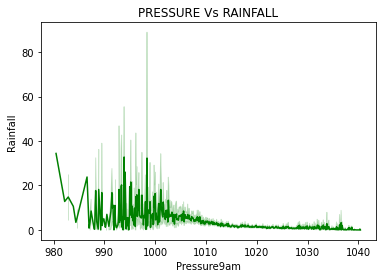

In [ ]:
plt.title("PRESSURE Vs RAINFALL")
sns.lineplot(data=df,x='Pressure9am',y='Rainfall',color='green')

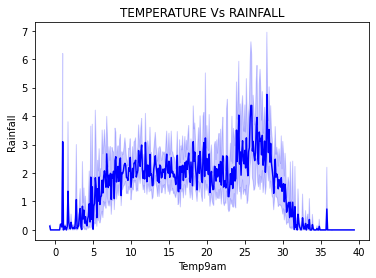

In [ ]:
plt.title("TEMPERATURE Vs RAINFALL")
sns.lineplot(data=df,x='Temp9am',y='Rainfall',color='blue')

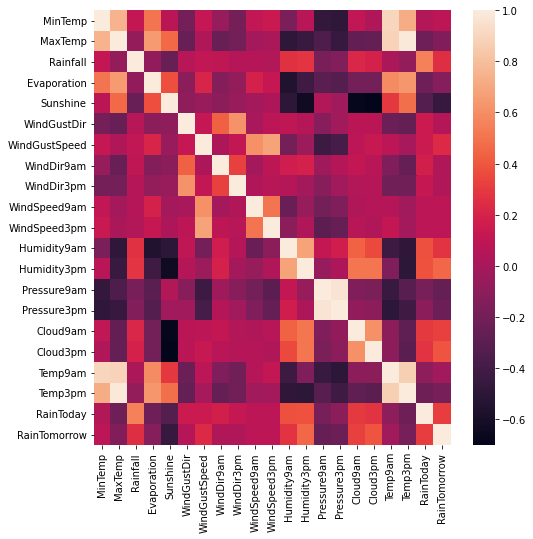

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

In [ ]:
import plotly.express as px
graph = px.scatter(df,x='WindSpeed9am',y='Rainfall')
graph.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb70bfb1d90>,
      dtype=object)

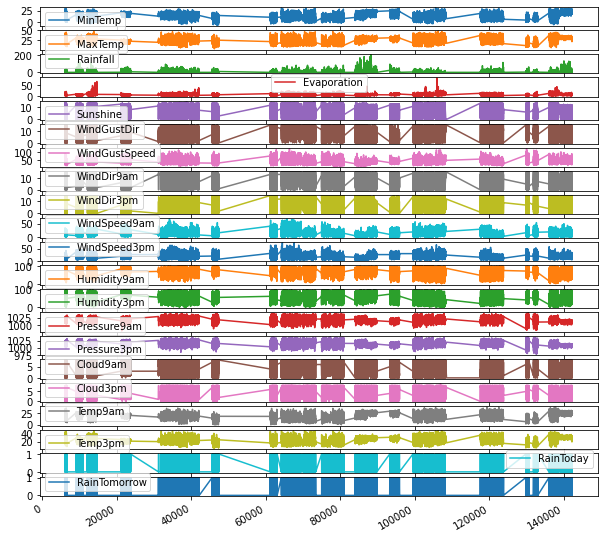

In [ ]:
df.plot(subplots=True,figsize=(10,10))

# PREDICTION OF DIFFERENT MODELS

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
import time
t0 = time.time()
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
tt_lr=int(time.time())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
accuracy_lr=accuracy_score(y_test, predictions)
print("THE ACCURACY USING LOGISTIC REGRESSION: ",accuracy_lr)
print("THE TIME TAKEN USING LOGISTIC REGRESSION: ",tt_lr)



[[16777   835]
 [ 2586  2387]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17612
           1       0.74      0.48      0.58      4973

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585

THE ACCURACY USING LOGISTIC REGRESSION:  0.8485277839273855
THE TIME TAKEN USING LOGISTIC REGRESSION:  1642655046


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time.time()
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
tt_dt=int(time.time())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
accuracy_dt=accuracy_score(y_test, predictions)
print("THE ACCURACY USING DECISION TREE: ",accuracy_dt)
print("THE TIME TAKEN USING DECISION TREE: ",tt_dt)

[[15170  2442]
 [ 2276  2697]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     17612
           1       0.52      0.54      0.53      4973

    accuracy                           0.79     22585
   macro avg       0.70      0.70      0.70     22585
weighted avg       0.79      0.79      0.79     22585

THE ACCURACY USING DECISION TREE:  0.7911002878016382
THE TIME TAKEN USING DECISION TREE:  1642655059


In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
t0=time.time()
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
tt_rf=int(time.time())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
accuracy_rf=accuracy_score(y_test, predictions)
print("THE ACCURACY USING RANDOM FOREST CLASSIFIER: ",accuracy_rf)
print("THE TIME TAKEN USING RANDOM FOREST CLASSIFIER: ",tt_rf)

[[16815   797]
 [ 2442  2531]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17612
           1       0.76      0.51      0.61      4973

    accuracy                           0.86     22585
   macro avg       0.82      0.73      0.76     22585
weighted avg       0.85      0.86      0.85     22585

THE ACCURACY USING RANDOM FOREST CLASSIFIER:  0.8565862297985388
THE TIME TAKEN USING RANDOM FOREST CLASSIFIER:  1642655098


In [ ]:
import xgboost as xgb
t0=time.time()
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
tt_xgb=int(time.time())
acc_xgb=accuracy_score(y_test,pred)

print('f1',classification_report(y_test,pred))
print('CONFUSION MATRIX',confusion_matrix(y_test,pred))

print('ACCURACY USING XG BOOST: ',acc_xgb)
print('TIME TAKEN USING XG BOOST: ',tt_xgb)

f1               precision    recall  f1-score   support

           0       0.87      0.95      0.91     17612
           1       0.75      0.49      0.59      4973

    accuracy                           0.85     22585
   macro avg       0.81      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585

CONFUSION MATRIX [[16800   812]
 [ 2534  2439]]
ACCURACY USING XG BOOST:  0.8518485720611025
TIME TAKEN USING XG BOOST:  1642655103


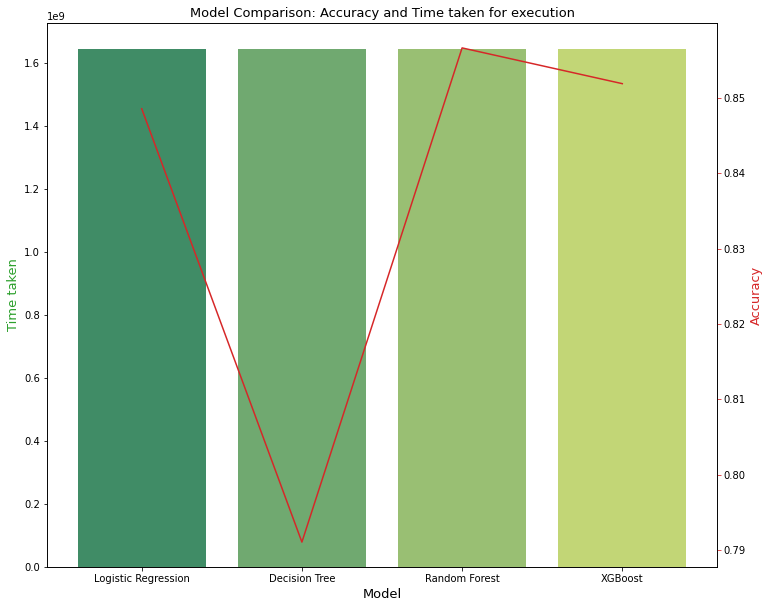

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf,acc_xgb]
tt = [tt_lr, tt_dt, tt_rf,tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
print("The accuracy of Logistic Regression is: {0}".format(accuracy_lr))
print("The time taken for Logistic Regression is: {0}".format(tt_lr))
print("\n\nThe accuracy of Decision Tree is: {0}".format(accuracy_dt))
print("The time taken for Decision Tree is: {0}".format(tt_dt))
print("\n\nThe accuracy of Random forest classifier is: {0}".format(accuracy_rf))
print("The time taken for Random forest classifier is: {0}".format(tt_rf))
print("\n\nThe accuracy of XGBoost is:",(acc_xgb))
print("The time taken for XGBoost is:",(tt_xgb))

The accuracy of Logistic Regression is: 0.8485277839273855
The time taken for Logistic Regression is: 1642655046


The accuracy of Decision Tree is: 0.7911002878016382
The time taken for Decision Tree is: 1642655059


The accuracy of Random forest classifier is: 0.8565862297985388
The time taken for Random forest classifier is: 1642655098


The accuracy of XGBoost is: 0.8518485720611025
The time taken for XGBoost is: 1642655103


# PREDICTING RAINFALL TOMORROW AND TODAY

In [ ]:
X = df[['MaxTemp', 'MinTemp','Rainfall','WindSpeed9am','WindSpeed3pm']]
y = df['RainTomorrow']

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
maxi=float(input("ENTER MAX TEMP:"))
mini=float(input("ENTER MIN TEMP:"))
rainf=float(input("ENTER RAINFALL:"))
wind9=float(input("ENTER WINDSPEED AT 9 AM:"))
wind3=float(input("ENTER WINDSPEED AT 3 PM:"))
#hum9=float(input("ENTER HUMIDITY AT 9 AM:"))
#hum3=float(input("ENTER HUMIDITY AT 3 PM:"))
#temp9=float(input("ENTER TEMPERATURE AT 9 AM:"))
#temp3=float(input("ENTER TEMPERATURE AT 3 PM:"))

y=df.RainTomorrow.values.reshape(-1,1)
raintom =regr.predict([[maxi,mini,rainf,wind9,wind3]])
if(raintom<0.5):
    print("RAIN TOMORROW: NO")
if(raintom>=0.5 ):
    print("RAIN TOMORROW: YES")
print(raintom)

ENTER MAX TEMP:12
ENTER MIN TEMP:21
ENTER RAINFALL:13
ENTER WINDSPEED AT 9 AM:25
ENTER WINDSPEED AT 3 PM:16
RAIN TOMORROW: YES
[0.79366334]


In [ ]:
X = df[['MaxTemp', 'MinTemp','Rainfall','WindSpeed9am','WindSpeed3pm']]
y = df['RainToday']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
maxi=float(input("ENTER MAX TEMP:"))
mini=float(input("ENTER MIN TEMP:"))
rainf=float(input("ENTER RAINFALL:"))
wind9=float(input("ENTER WINDSPEED AT 9 AM:"))
wind3=float(input("ENTER WINDSPEED AT 3 PM:"))
#hum9=float(input("ENTER HUMIDITY AT 9 AM:"))
#hum3=float(input("ENTER HUMIDITY AT 3 PM:"))
#temp9=float(input("ENTER TEMPERATURE AT 9 AM:"))
#temp3=float(input("ENTER TEMPERATURE AT 3 PM:"))

y=df.RainTomorrow.values.reshape(-1,1)
raintod =regr.predict([[maxi,mini,rainf,wind9,wind3]])
if(raintod<0.5):
    print("RAIN TODAY: NO")
if(raintod>=0.5 ):
    print("RAIN TODAY: YES")
print(raintod)

ENTER MAX TEMP:21
ENTER MIN TEMP:23
ENTER RAINFALL:14
ENTER WINDSPEED AT 9 AM:15
ENTER WINDSPEED AT 3 PM:13
RAIN TODAY: YES
[0.75140476]


# PRECIPITATION LEVEL

In [ ]:
X = df[['MaxTemp', 'MinTemp','WindSpeed9am','WindSpeed3pm']]
y = df['Rainfall']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
maxi=float(input("ENTER MAX TEMP:"))
mini=float(input("ENTER MIN TEMP:"))
wind9=float(input("ENTER WINDSPEED AT 9 AM:"))
wind3=float(input("ENTER WINDSPEED AT 3 PM:"))
#hum9=float(input("ENTER HUMIDITY AT 9 AM:"))
#hum3=float(input("ENTER HUMIDITY AT 3 PM:"))
#temp9=float(input("ENTER TEMPERATURE AT 9 AM:"))
#temp3=float(input("ENTER TEMPERATURE AT 3 PM:"))

y=df.Rainfall.values.reshape(-1,1)
preci=regr.predict([[maxi,mini,wind9,wind3]])
print("THE PRECIPITATION LEVEL IS: ",preci)

ENTER MAX TEMP:12
ENTER MIN TEMP:21
ENTER WINDSPEED AT 9 AM:13
ENTER WINDSPEED AT 3 PM:25
THE PRECIPITATION LEVEL IS:  [10.63484591]


In [ ]:
if preci<15:
    print("LESS RAINFALL AND NO ALERT")
if preci>=15 and preci<65:
    print("MODERATE RAINFALL AND GREEN ALERT")
if preci>=65 and preci<115:
    print("HEAVY RAINFALL AND YELLOW ALERT")
if preci>=115 and preci<205:
    print("VERY HEAVY RAINFALL AND ORANGE ALERT")
if preci>=205 :
    print("EXTREMELY HEAVY RAINFALL AND RED ALERT")

LESS RAINFALL AND NO ALERT


# RAIN TOMORROW PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x = df.iloc[:,df.columns!='RainTomorrow'] #atributes / data
y = df.iloc[:,df.columns=='RainTomorrow'] #outcomes / label

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#divide 20% for test data & 80% for train data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
#call 'RandomForestClassifier' algorithm
model=RandomForestClassifier()

In [ ]:
#fit the training data into the algo
model.fit(xtrain,ytrain.values.ravel())

RandomForestClassifier()

In [ ]:
# pass the test data into the machine to see the result
predict_output = model.predict(xtest)

In [ ]:
# test data result (outcomes) 1- RAIN TOMORROW 0- NO RAIN
print(predict_output[0:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 

# IMPORT WEBSITE

In [ ]:
import requests
city = input('INPUT CITY NAME: ')
print('Displaying Weather report for: ' + city)
url = 'https://wttr.in/{}'.format(city)
res = requests.get(url)

print(res.text)

INPUT CITY NAME: COIMBATORE
Displaying Weather report for: COIMBATORE
Weather report: COIMBATORE

                Haze
   _ - _ - _ -  +77(78) °F     
    _ - _ - _   ← 0 mph        
   _ - _ - _ -  1 mi           
                0.0 in         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Thu 20 Jan ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│     \   /     Sunny          │     \   /     Sunny          │     \   /     Clear          │     \   /     Clear          │
│      .-.      +73(77) °F     │      .-.      +87(89) °F     │      .-.      82 °F          │      .-.      +73(77) °F    